# CAP Baseline n = 200
random sample

In [16]:
import numpy as np
import pandas

In [17]:
cap_subset_200 = pandas.read_csv('Z:/User Folders/SRajurkar/X3726/CAP Baseline subset n = 200/7.65-32nm/final data.csv')
cap_subset_200.head()

,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561,adjusted midzone
0,1.0,14.457100000,0.867600000,3.681250000,13.913951,0.214814,0.214814,15.546689
1,2.0,14.533600000,0.172876000,0.843518000,13.940082,0.207994,0.207994,15.794894
2,3.0,none,none,none,19.226145,0.340974,0.340974,26.578598
3,4.0,14.423000000,0.765979000,4.077730000,11.585062,0.204584,0.204584,13.065621
4,5.0,14.410800000,1.065000000,3.363600000,17.529256,0.286418,0.286418,21.066029


In [18]:
cap_no_curve = cap_subset_200[(cap_subset_200['Center'] == 'none') | (cap_subset_200['Center'] == 'excess')]
cap_with_curve = cap_subset_200[(cap_subset_200['Center'] != 'none') & (cap_subset_200['Center'] != 'excess')]

cap_with_curve['Area'] = pandas.to_numeric(cap_with_curve['Area'], errors='coerce')
cap_with_curve['FWHM'] = pandas.to_numeric(cap_with_curve['FWHM'], errors='coerce')
cap_with_curve['Center'] = pandas.to_numeric(cap_with_curve['Center'], errors='coerce')
print(str(len(cap_no_curve)) + ' samples without curves')
print(str(len(cap_with_curve)) + ' samples with curves')
cap_no_curve.head()
cap_with_curve.head()


37 samples without curves
163 samples with curves


C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_11580\3532985251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['Area'] = pandas.to_numeric(cap_with_curve['Area'], errors='coerce')
C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_11580\3532985251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['FWHM'] = pandas.to_numeric(cap_with_curve['FWHM'], errors='coerce')
C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_11580\3532985251.py:6: SettingWithCopyWarning: 
A value 

,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561,adjusted midzone
0,1.0,14.4571,0.867600,3.681250,13.913951,0.214814,0.214814,15.546689
1,2.0,14.5336,0.172876,0.843518,13.940082,0.207994,0.207994,15.794894
3,4.0,14.4230,0.765979,4.077730,11.585062,0.204584,0.204584,13.065621
4,5.0,14.4108,1.065000,3.363600,17.529256,0.286418,0.286418,21.066029
6,7.0,14.5480,0.801486,1.872990,19.147086,0.426218,0.426218,23.855667


In [19]:
print(cap_no_curve.describe().head(4))
print(cap_with_curve.describe().head(4))


        Sample ID    midzone      15.14  15.1403561  adjusted midzone
count   37.000000  37.000000  37.000000   37.000000         37.000000
mean   100.918919  15.817084   0.253335    0.253335         19.325112
std     57.689484   4.140147   0.076569    0.076569          3.953495
min      3.000000   9.379674   0.122751    0.122751         13.033801
        Sample ID      Center        Area        FWHM     midzone       15.14  \
count  163.000000  163.000000  163.000000  163.000000  163.000000  163.000000   
mean   100.404908   14.556653    0.755715    2.572597   16.767312    0.291585   
std     58.099068    0.311006    0.433539    0.935105    3.836781    0.070591   
min      1.000000   14.028800    0.076994    0.843518    9.652617    0.139799   

       15.1403561  adjusted midzone  
count  163.000000        163.000000  
mean     0.291585         19.606457  
std      0.070591          3.739938  
min      0.139799         12.569810  


Distribution of curve centers

<Axes: >

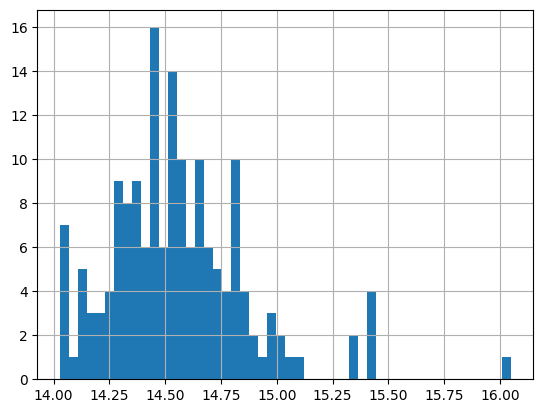

In [20]:
cap_with_curve['Center'].hist(bins=50)

15.14 nm point vs 14.5-18 nm bin

0.8389397156821091


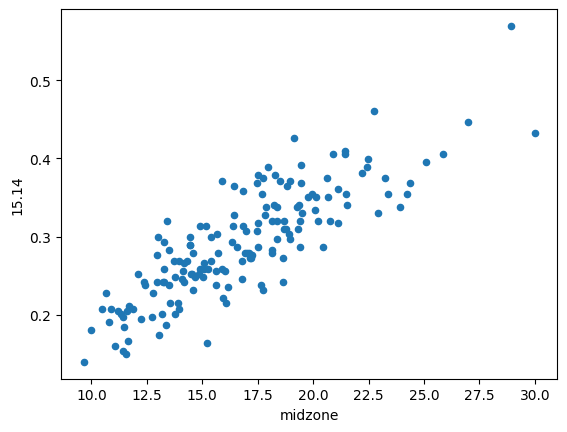

In [21]:
cap_with_curve.plot.scatter('midzone', '15.14')

x = cap_with_curve['midzone']
y = cap_with_curve['15.14']



r = np.corrcoef(x, y)
print(r[1][0])

MZ curve area vs 14.5-18 nm bin

0.668046518655217


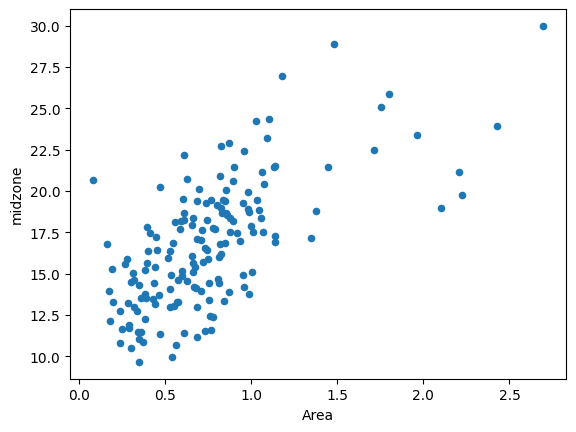

In [22]:

cap_with_curve.plot.scatter('Area', 'midzone')

x = cap_with_curve['Area'].astype(float)
y = cap_with_curve['midzone']


r = np.corrcoef(x, y)

print(r[0][1])


MZ curve area vs 15.14 point

0.5183463483461859


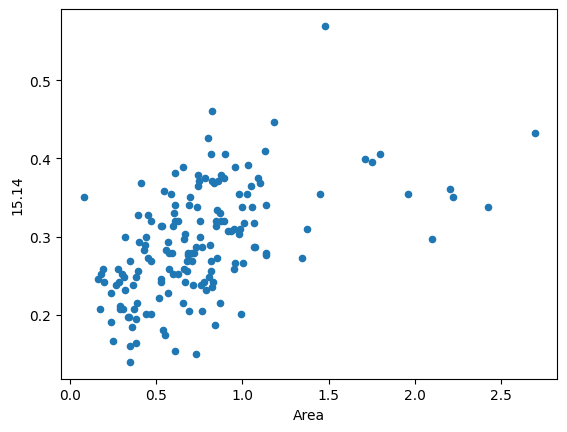

In [23]:
cap_with_curve.plot.scatter('Area', '15.14')

print(np.corrcoef(cap_with_curve['Area'], cap_with_curve['15.14'])[0][1])

Addition of center - fwhm as a datapoint for each sample

In [24]:

cap_with_curve['lower mz bound'] = cap_with_curve['Center'] - cap_with_curve['FWHM']/2
cap_with_curve['higher mz bound'] = cap_with_curve['Center'] + cap_with_curve['FWHM']/2

C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_11580\1172434505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['lower mz bound'] = cap_with_curve['Center'] - cap_with_curve['FWHM']/2
C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_11580\1172434505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['higher mz bound'] = cap_with_curve['Center'] + cap_with_curve['FWHM']/2


In [25]:
cap_with_curve.head()


,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561,adjusted midzone,lower mz bound,higher mz bound
0,1.0,14.4571,0.867600,3.681250,13.913951,0.214814,0.214814,15.546689,12.616475,16.297725
1,2.0,14.5336,0.172876,0.843518,13.940082,0.207994,0.207994,15.794894,14.111841,14.955359
3,4.0,14.4230,0.765979,4.077730,11.585062,0.204584,0.204584,13.065621,12.384135,16.461865
4,5.0,14.4108,1.065000,3.363600,17.529256,0.286418,0.286418,21.066029,12.729000,16.092600
6,7.0,14.5480,0.801486,1.872990,19.147086,0.426218,0.426218,23.855667,13.611505,15.484495


In [26]:
cap_with_curve.describe().head(4)


,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561,adjusted midzone,lower mz bound,higher mz bound
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,100.404908,14.556653,0.755715,2.572597,16.767312,0.291585,0.291585,19.606457,13.270354,15.842951
std,58.099068,0.311006,0.433539,0.935105,3.836781,0.070591,0.070591,3.739938,0.546496,0.576196
min,1.000000,14.028800,0.076994,0.843518,9.652617,0.139799,0.139799,12.569810,11.200300,14.851380


In [27]:
lower_bound_mean = 13.2704
higher_bound_mean = 15.8430

cap_with_curve['adjusted midzone'] = pandas.to_numeric(cap_with_curve['adjusted midzone'], errors='coerce')

C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_11580\1158058612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['adjusted midzone'] = pandas.to_numeric(cap_with_curve['adjusted midzone'], errors='coerce')


MZ curve area vs adjusted midzone bin

0.5438576881727264


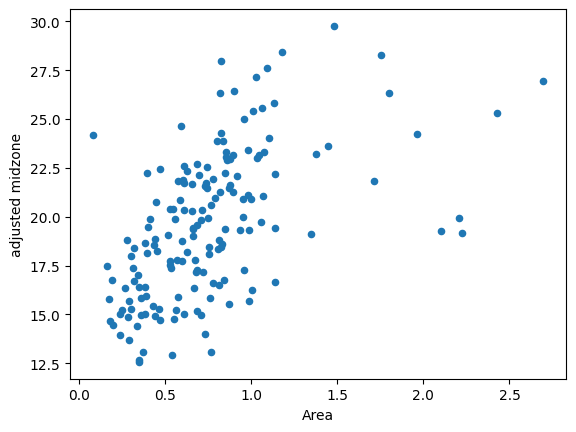

In [28]:
cap_with_curve.plot.scatter('Area', 'adjusted midzone')
print(np.corrcoef(cap_with_curve['Area'], cap_with_curve['adjusted midzone'])[0][1])



0.849503394252155


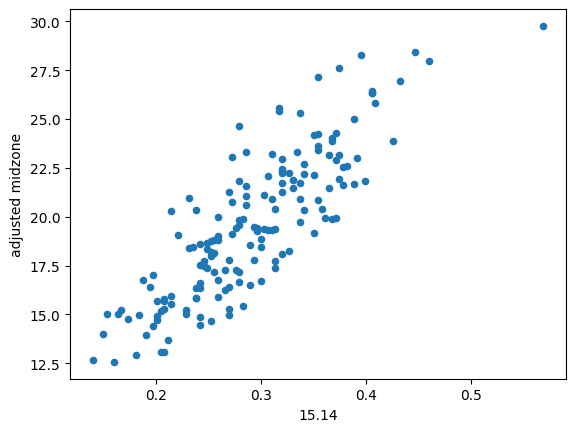

In [29]:
cap_with_curve.plot.scatter('15.14', 'adjusted midzone')
print(np.corrcoef(cap_with_curve['15.14'], cap_with_curve['adjusted midzone'])[0][1])

Midzone bin vs adjusted midzone bin

0.9093173555821856


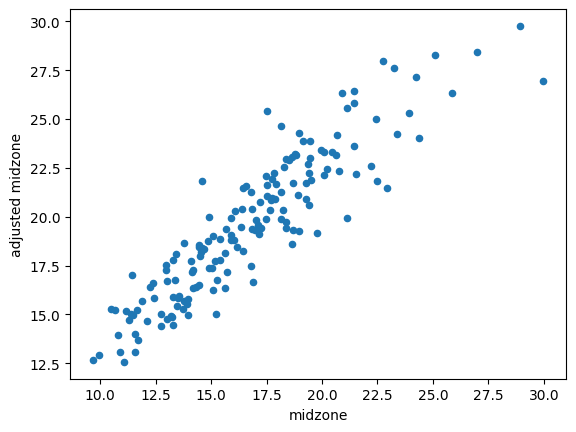

In [30]:
cap_with_curve.plot.scatter('midzone', 'adjusted midzone')
print(np.corrcoef(cap_with_curve['midzone'], cap_with_curve['adjusted midzone'])[0][1])

Strong correlation between old and modified midzone bin, likely because the region that contributes most of the particle count to the original bin is preserved in the new bin.

Also provides slightly stronger correlation with 15.14 than old midzone bin.

Attempts at HDL deconvolution

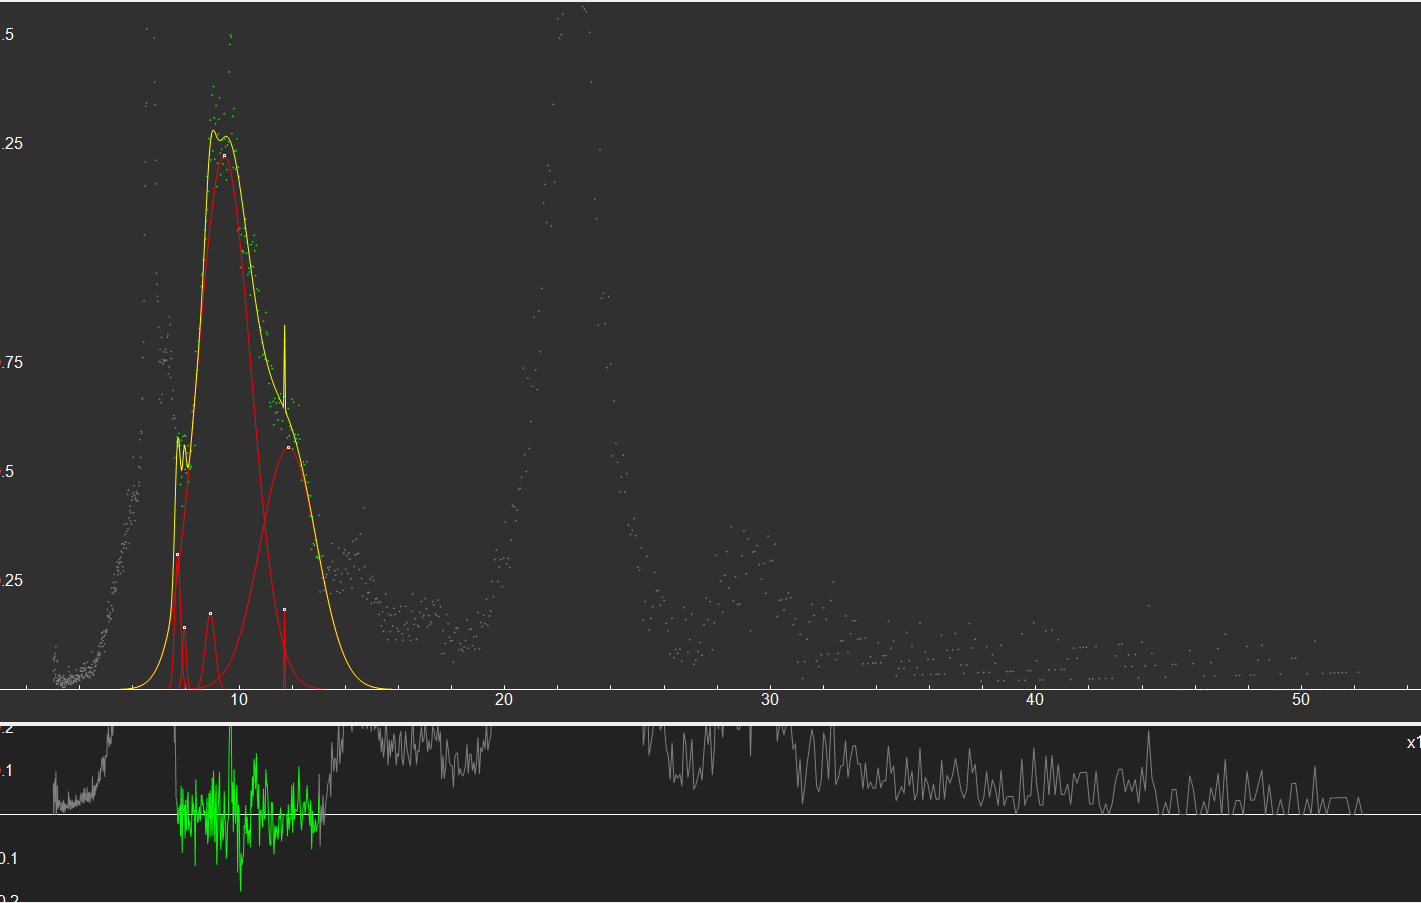

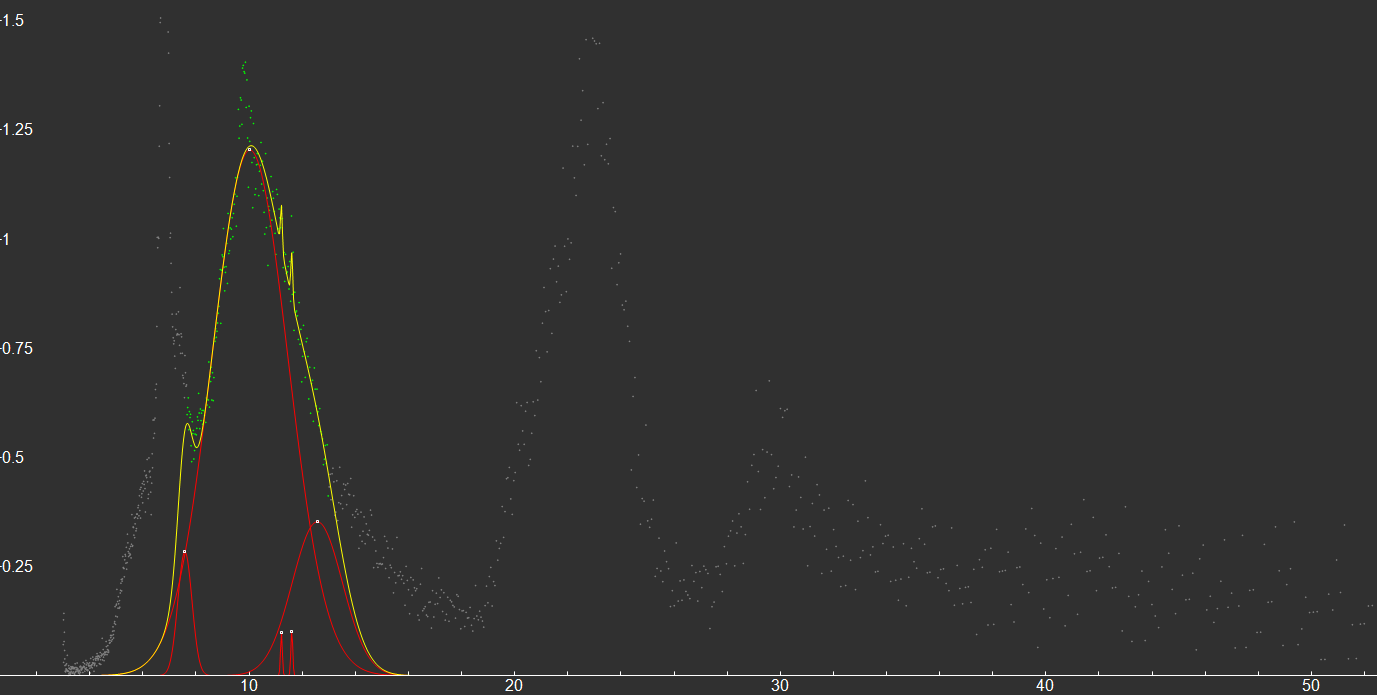

Attempt at LDL deconvolution, produces many overlapping curves, might not be conducive to clean curve fitting

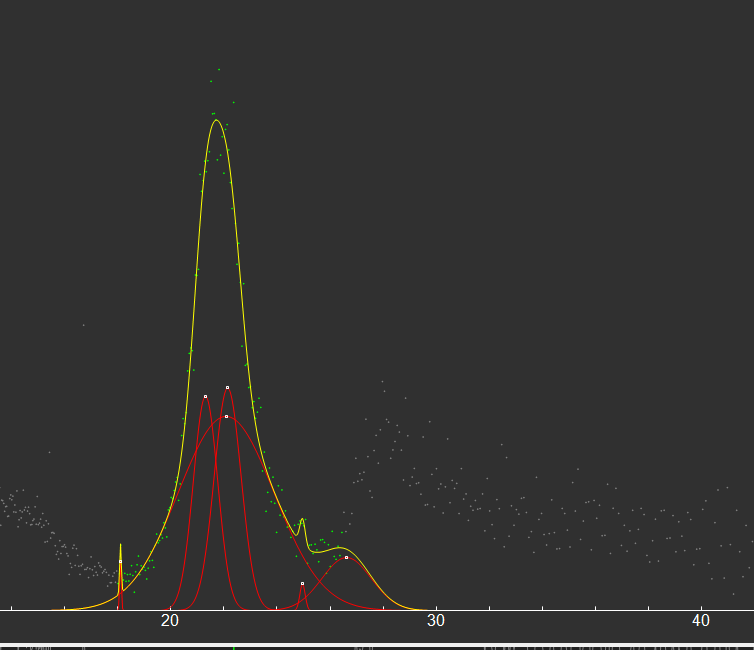

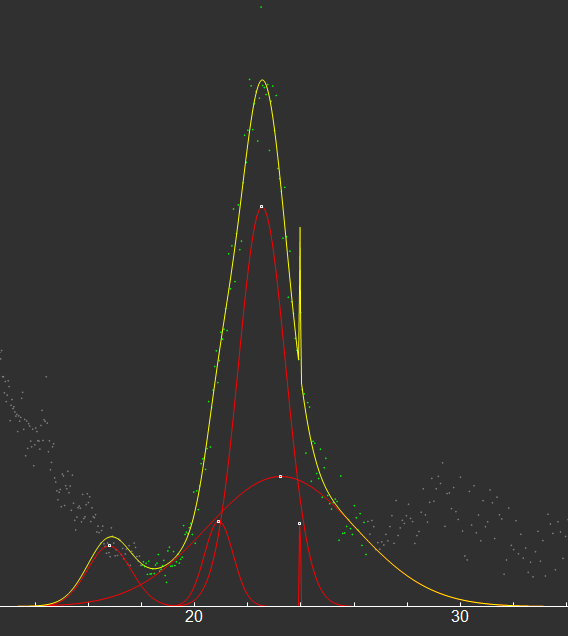